In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

sales = pd.read_csv(r'C:\Users\shasw\Downloads\ML Workshop\Train.csv')
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [72]:
sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
sales.shape

(8523, 12)

In [5]:
sales.size

102276

In [6]:
sales.iloc[sales.Item_Outlet_Sales.idxmax()].Item_Identifier #It prints the item with maximum outlet sale.

'NCE42'

In [7]:
sales.Item_Outlet_Sales.max() #It prints the above item no. of outlet sales.

13086.9648

In [8]:
c = 0
for i in sales.Item_Fat_Content:
    if(i == "Low Fat"):
        c += 1
print("Number of low fat content items:", c) 

Number of low fat content items: 5089


In [9]:
c = sales.Item_MRP.max()
d = sales.iloc[sales.Item_MRP.idxmax()].Item_Identifier
print("The item", d, "has max MRP of", c)

The item FDS13 has max MRP of 266.8884


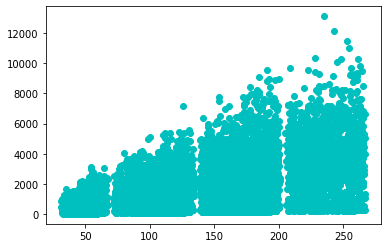

In [49]:
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.scatter(sales.Item_MRP, sales.Item_Outlet_Sales, label='skitscat', color = 'c')

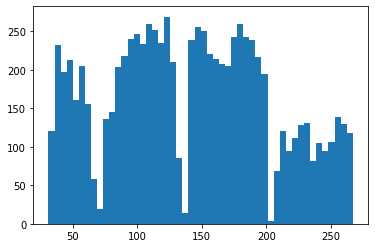

In [50]:
plt.hist(sales.Item_MRP, 50)
plt.show()

In [43]:
degree_counts = sales['Item_Fat_Content'].value_counts()
degree_counts

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

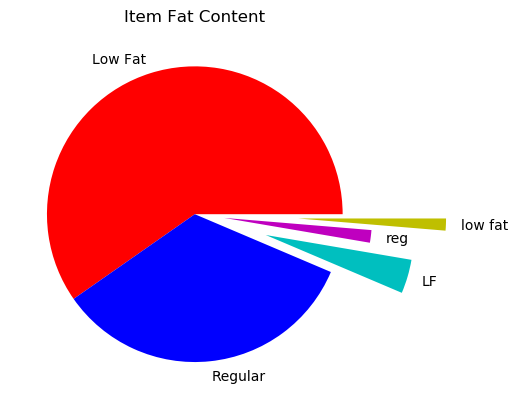

In [44]:
plt.rcdefaults()
explode = [0, 0, 0.5, 0.2, 0.7]
colors = ['r', 'b', 'c', 'm', 'y']
labels = ['Low Fat', 'Regular', 'LF', 'reg', 'low fat']
plt.pie(degree_counts, colors= colors, labels=labels, explode = explode)
plt.title('Item Fat Content')
plt.show()

In [45]:
degree_counts = sales['Outlet_Type'].value_counts()
degree_counts

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Text(0.5, 0, '\nOutlet Type')

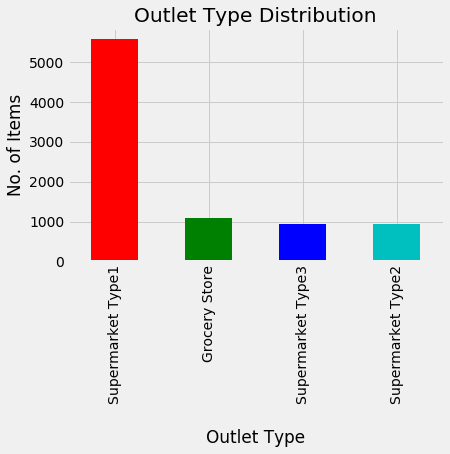

In [56]:
colors = ['r', 'g', 'b', 'c', 'm', 'k', 'y']
degree_counts.plot(kind='bar', color= colors)
plt.title('Outlet Type Distribution')
plt.ylabel('No. of Items')
plt.xlabel('\nOutlet Type')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

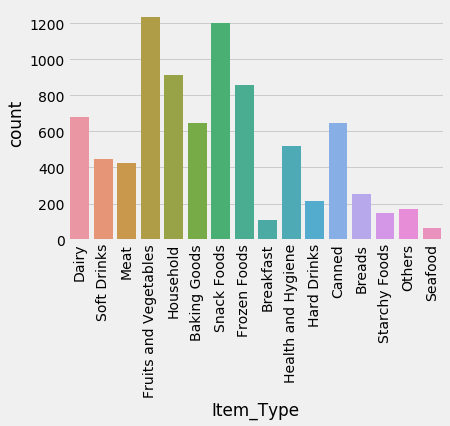

In [62]:
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.countplot(sales.Item_Type)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

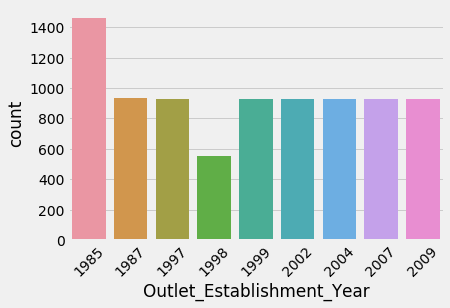

In [73]:
sns.countplot(sales.Outlet_Establishment_Year)
plt.xticks(rotation=45)

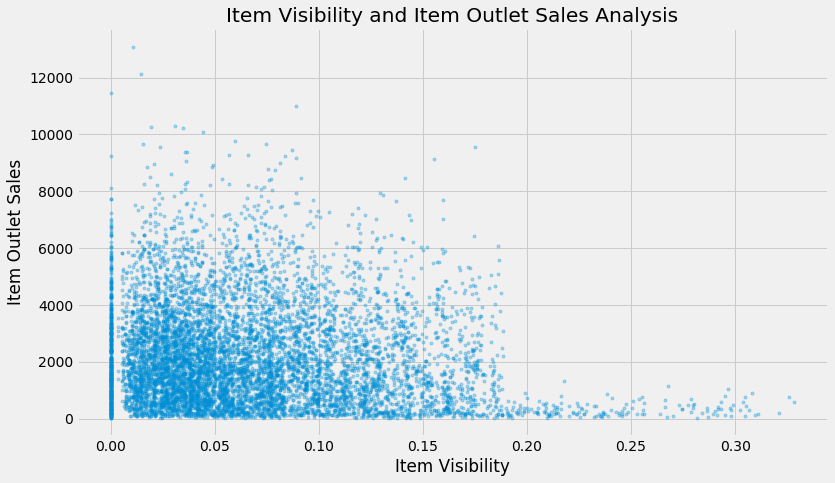

In [71]:
plt.figure(figsize=(12,7))
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.title('Item Visibility and Item Outlet Sales Analysis')
plt.plot(sales.Item_Visibility, sales['Item_Outlet_Sales'] ,'.', alpha = 0.3)

Text(0.5, 1.0, 'Item Outlet Sales Distribution')

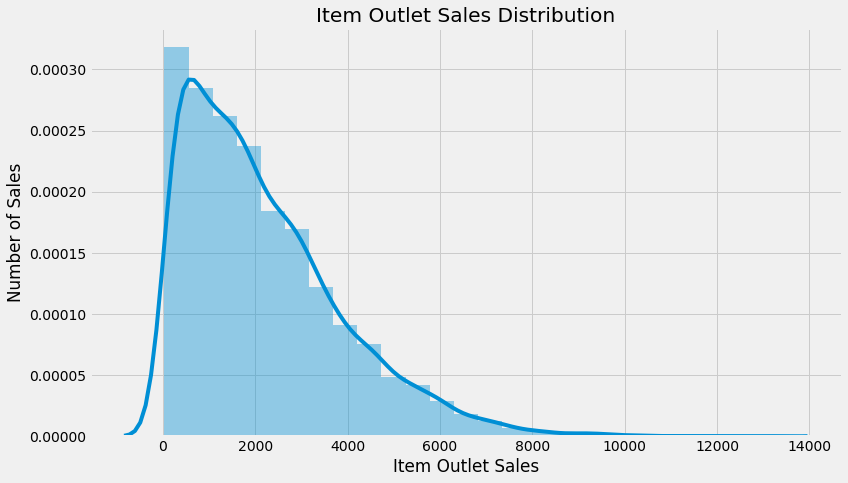

In [55]:
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(sales.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item Outlet Sales")
plt.ylabel("Number of Sales")
plt.title("Item Outlet Sales Distribution")